### Необходимо решить линейное уравнение переноса
$$
\frac{\partial u(x)}{\partial t} + c\frac{\partial u(x)}{\partial x}=0 \\
c = const > 0 
$$
с начальным условием при М=2

$$
\begin{cases} 
    u(0, x) = 1, x > 0 \\
    u(0, x) = exp[-(\frac{x}{\delta})^M], x \leqslant 0
\end{cases}$$

In [195]:
from math import pow, log, sqrt, sin, cos, e, pi, exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

M=2 #гауссова функция'M': 4, 'c': 0.5, 'd': 2, 'a': -4, 'b': 10, 'N': 400, 'tau': 0.05, 'T': 30
c = 0.5
delta = 2
tau=0.05
T=30

## Неявный уголок
$$
\hat{u}_j - u_j + r(\hat{u}_j - \hat{u}_{j-1}) = 0, r = \frac{c\tau}{h}
$$

Запишем начальные условия и формулу для точного решения

In [196]:
def phi(x, t, delta, M, c):
    #if (x > 0):
    #    return 1
    #else: 
    #    return exp(-pow((x-c*t)/delta, M))
    return exp(-pow((x-c*t)/delta, M))
    
def phi_start(x, t, delta, M, c):
    if (x > 0):
        return 1
    else: 
        return exp(-pow((x-c*t)/delta, M))

Равномерная сетка

In [197]:
a = -4.0
b = 30
N = 2000
T=50
h = (b-a)/N  # step x
t = 0.05     # step t
r = c*tau/h
print('Kurand', r)
x=[]
lower=[]
results=[]

for i in range(1, N+1):
    x.append(a+h*i) #сетка
    lower.append(phi(x[i-1], 0, delta, M, c)) #начальные условия
print(len(x), len(lower), a+h*i)

('Kurand', 1.4705882352941175)
(2000, 2000, 30.0)


считаем следующие слои

In [198]:
t=0
while t<T:
    results.append(lower) #write old layer in results
    #start forming new layer
    layer=[phi(x[0], 0, delta, M, c)] #for i=0
    #print(len(lower))
    for i in range(1, N):
        layer.append(float(lower[i]+r*layer[i-1])/(1.0+r))
    #print(len(layer))
    lower=layer
    t+=tau

построим график

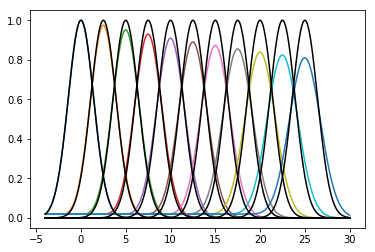

In [199]:
#our ugolock
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, results[i])

#theory
theory=[]
for i in range(len(results)):
    th1=[]
    for elem in x:
        th1.append(phi(elem, i*tau, delta, M, c))
    theory.append(th1)
    
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, theory[i], color='black')
plt.show()


посчитаем ошибки

In [200]:
def find_emax(results, theory, i):
    emax=0
    for j in range(len(results[i])):
        if emax<abs(results[i][j]-theory[i][j]):
            emax=abs(results[i][j]-theory[i][j])
    return emax
    
def find_erms(results, theory, i):
    erms=0
    for j in range(len(results[i])):
        foo=abs(results[i][j]-theory[i][j])
        erms+=pow(foo, 2)
    return sqrt(erms/len(results[i]))

def find_TV(results, i):
    TV=0
    for j in range(len(results[i])-1):
        TV+=abs(results[i][j+1]-results[i][j])
    return TV

In [201]:
print find_emax(results, theory, i=300) #i - time mark
print find_erms(results, theory, i=300) #i - time mark
print find_TV(results, i=300)

0.07049743664
0.0189970132466
1.84008951168


## схема Лакса-Вендроффа

$$
\large \frac{\hat{u}_j - u_j}{\tau} + \frac{\bar{f}_{j+1/2} - \bar{f}_{j-1/2}}{h} = 0
$$

считаем

In [202]:
a = -4.0
b = 10.0
N = 200
T=30
h = (b-a)/N  # step x
t = 0.05     # step t
r = c*tau/h
print('Kurand', r)
x=[]
lower=[]
results=[]

for i in range(1, N+1):
    x.append(a+h*i) #сетка
    lower.append(phi(x[i-1], 0, delta, M, c)) #начальные условия
print(len(x), len(lower), a+h*i)

def fplus(func,index):
    if (i+1==N):
        return func[index]+(func[0]-func[index])*(1-r)/2 
    return func[index]+(func[index+1]-func[index])*(1-r)/2
def fminus(func,index):
    return func[index]+(func[index]-func[index-1])*(1-r)/2 

('Kurand', 0.35714285714285715)
(200, 200, 10.000000000000002)


In [203]:
#calculate next layer
t=0
while t<T:
    results.append(lower) #write old layer in results
    #start forming new layer
    layer=[phi(x[0], 0, delta, M, c)] #for i=0
    #print(len(lower))
    for i in range(1, N):
        layer.append(float((fplus(lower, i)-fminus(lower, i))*tau/h)+lower[i])
    #print(len(layer))
    lower=layer
    t+=tau

строим график

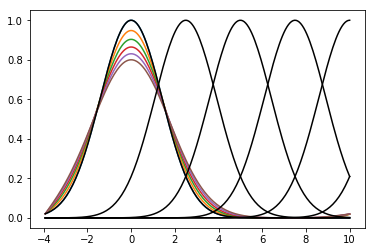

In [204]:
#our scheme
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, results[i])

#theory
theory=[]
for i in range(len(results)):
    th1=[]
    for elem in x:
        th1.append(phi(elem, i*tau, delta, M, c))
    theory.append(th1)
    
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, theory[i], color='black')
plt.show()


In [205]:
#ошибки
print find_emax(results, theory, i=300) #i - time mark
print find_erms(results, theory, i=300) #i - time mark
print find_TV(results, i=300)

0.999841231553
0.575480952019
1.72774296511


# КАБАРЕ

$$
\hat{u}_j - u_j + u_{j-1} - \check{u}_{j-1} + 2r(u_j - u_{j-1}) = 0, r = \frac{c\tau}{h}
$$

In [206]:
a = -4.0
b = 10.0
N = 400
T=30
h = (b-a)/N  # step x
t = 0.05     # step t
r = c*tau/h
print('Kurand', r)
x=[]
lower=[]
results=[]

for i in range(1, N+1):
    x.append(a+h*i) #сетка
    lower.append(phi(x[i-1], 0, delta, M, c)) #начальные условия
deep=lower
print(len(x), len(lower), a+h*i)


('Kurand', 0.7142857142857143)
(400, 400, 10.000000000000002)


In [207]:
#calculate next layer
t=0
while t<T:
    results.append(lower) #write old layer in results
    #start forming new layer
    layer=[phi(x[0], 0, delta, M, c)] #for i=0
    #print(len(lower))
    for i in range(1, N):
        layer.append( lower[i]-lower[i-1]+deep[i-1]-2*r*(lower[i]-lower[i-1]) )
    #print(len(layer))
    deep=lower
    lower=layer
    t+=tau

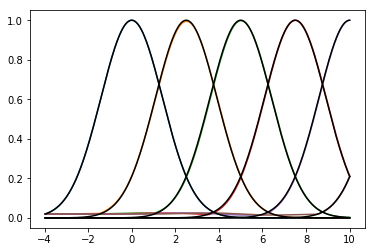

In [208]:
#our scheme
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, results[i])

#theory
theory=[]
for i in range(len(results)):
    th1=[]
    for elem in x:
        th1.append(phi(elem, i*tau, delta, M, c))
    theory.append(th1)
    
for i in range(len(results)):
    if (i%100)==0:
        plt.plot(x, theory[i], color='black')
plt.show()

In [209]:
#ошибки
print find_emax(results, theory, i=300) #i - time mark
print find_erms(results, theory, i=300) #i - time mark
print find_TV(results, i=300)

0.0248647431219
0.015476007952
1.78554570376
